Confusion Matrix:
 [[319   0   0   0   0]
 [ 18   0   0   0   0]
 [ 14   0   0   0   0]
 [ 12   0   0   0   0]
 [  3   0   0   0   0]]
Classification Report:
                precision    recall  f1-score   support

 Extreme Rain       1.00      0.00      0.00         3
   Heavy Rain       1.00      0.00      0.00        12
   Light Rain       1.00      0.00      0.00        18
Moderate Rain       1.00      0.00      0.00        14
      No Rain       0.87      1.00      0.93       319

     accuracy                           0.87       366
    macro avg       0.97      0.20      0.19       366
 weighted avg       0.89      0.87      0.81       366



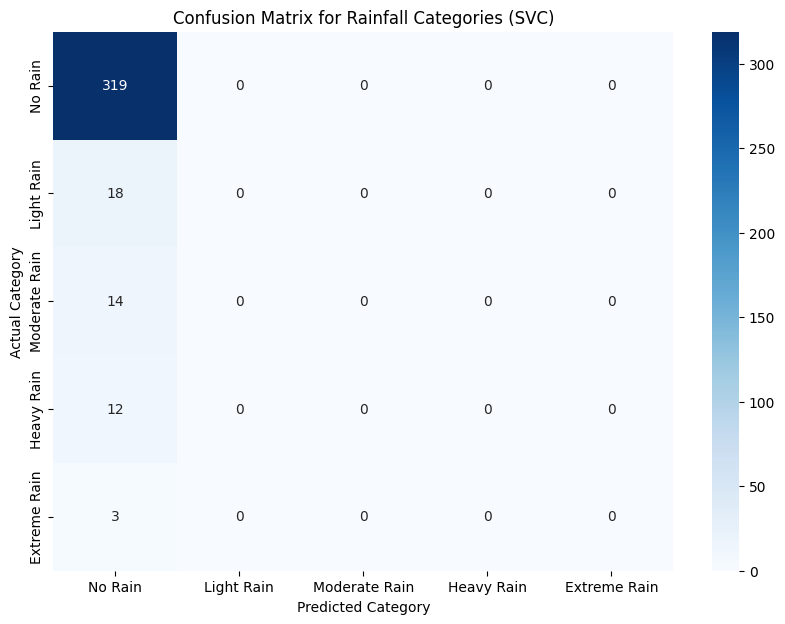

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("Rainfall_VIJ_Final_csv.csv")

# Prepare the features and target variable
X = data[['TempMin', 'TempaMax', 'humidity', 'windspeed']]  # Features
y = data['Rainfall']  # Target variable

# Define the categorization function based on rainfall values
"""
def categorize_rainfall(rainfall):
    if rainfall < 1:
        return 'No Rain'
    elif rainfall < 20:
        return 'Light Rain'
    elif 20 <= rainfall < 50:
        return 'Moderate Rain'
        '''
    elif 25 <= rainfall < 50:
        return 'Heavy Rain'
        '''
    elif 50 <= rainfall < 200:
        return 'Very Heavy Rain'
        '''
    elif 100 <= rainfall < 200:
        return 'Extreme Rain'
        '''
    else:
        return 'Severe Rain'
"""
def categorize_rainfall(rainfall):
    if rainfall < 5:
        return 'No Rain'
    elif 5 <= rainfall < 10:
        return 'Light Rain'
    elif 10 <= rainfall < 15:
        return 'Moderate Rain'
    elif 15 <= rainfall < 50:
        return 'Heavy Rain'
    else:
        return 'Extreme Rain'


# Apply the categorization to the target variable
y_categories = y.apply(categorize_rainfall)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categories, test_size=0.2, random_state=42)

# SVC model
svc_model = SVC(kernel='rbf', probability=True, random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

# Create a confusion matrix for categories
labels = ['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain', 'Extreme Rain']
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc, labels=labels)

# Display confusion matrix
print("Confusion Matrix:\n", conf_matrix_svc)

# Display classification report for performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred_svc, zero_division=1))

# Visualize the confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Rainfall Categories (SVC)')
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.show()


Misclassified Points:
        TempMin  TempaMax  humidity  windspeed
538   26.65555  35.42861      74.7       20.0
527   24.60146  31.71620      87.0       14.8
1315  24.14968  29.44152      88.3       37.1
1273  24.83328  31.88192      87.5       13.0
1050  24.16782  30.38898      86.1       18.4
1348  24.70431  30.03510      94.3       13.7
1336  25.47789  32.63374      81.0       13.0
575   25.30952  33.74858      81.3       11.2
976   24.64687  31.43253      80.9       14.8
1536  20.93718  28.59556      78.0       16.6
561   24.15586  28.56804      92.3       14.8
1384  24.22051  30.69245      87.8       13.0
963   25.44458  30.94061      92.2       11.2
1000  24.72330  29.19597      93.9       27.7
1709  24.40702  30.73729      89.9       27.7
1383  24.25413  28.30921      91.7       11.2
212   25.01618  32.15226      88.6       22.3
551   24.58151  30.51576      88.3       22.3
888   26.77904  37.55238      69.2       14.8
233   24.63873  33.06403      80.2       18.4
1378  24.34

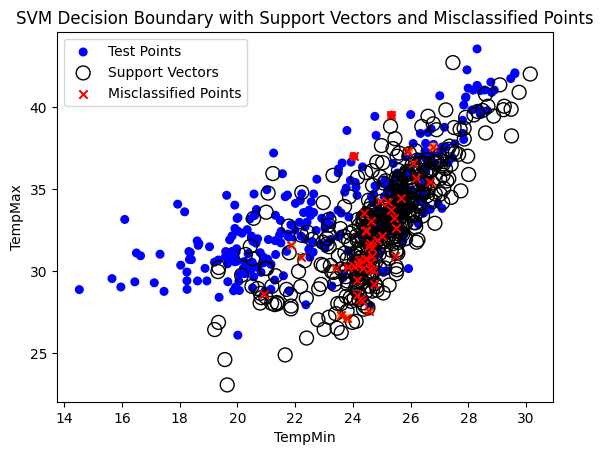

In [ ]:
# Analyze Misclassified Points

# Get decision function values for the test set
decision_values = svc_model.decision_function(X_test)

# Identify indices of misclassified points
# Identify indices of misclassified points
misclassified_indices = (y_pred_svc != y_test.to_numpy()).nonzero()[0]

# Get the actual misclassified data points
misclassified_points = X_test.iloc[misclassified_indices]

# Get the decision function values of misclassified points
misclassified_decision_values = decision_values[misclassified_indices]

# Print information on misclassified points
print("Misclassified Points:\n", misclassified_points)
print("Actual Labels:\n", y_test.iloc[misclassified_indices].values)
print("Predicted Labels:\n", y_pred_svc[misclassified_indices])
print("Decision Function Values of Misclassified Points:\n", misclassified_decision_values)

# Optional: Visualize Misclassified Points and Support Vectors
# Get the support vectors and indices
support_vectors = svc_model.support_vectors_
support_indices = svc_model.support_

import matplotlib.pyplot as plt
import seaborn as sns

# Define color mapping for rainfall categories
color_map = {
    'No Rain': 'blue',
    'Light Rain': 'lightgreen',
    'Moderate Rain': 'orange',
    'Heavy Rain': 'red',
    'Extreme Rain': 'purple'
}

# Apply color mapping to the y_test labels
colors = y_test.map(color_map)

# Plot the decision boundary, support vectors, and misclassified points
plt.scatter(X_test['TempMin'], X_test['TempaMax'], c=colors, s=30, label='Test Points')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')
plt.scatter(misclassified_points['TempMin'], misclassified_points['TempaMax'], color='red', marker='x', label='Misclassified Points')

plt.legend()
plt.title('SVM Decision Boundary with Support Vectors and Misclassified Points')
plt.xlabel('TempMin')
plt.ylabel('TempMax')
plt.show()



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters found: {'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
Confusion Matrix after Hyperparameter Tuning:
 [[314   5   0   0   0]
 [ 33  14   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]
Classification Report after Hyperparameter Tuning:
               precision    recall  f1-score   support

  Light Rain       0.74      0.30      0.42        47
     No Rain       0.90      0.98      0.94       319

    accuracy                           0.90       366
   macro avg       0.82      0.64      0.68       366
weighted avg       0.88      0.90      0.88       366



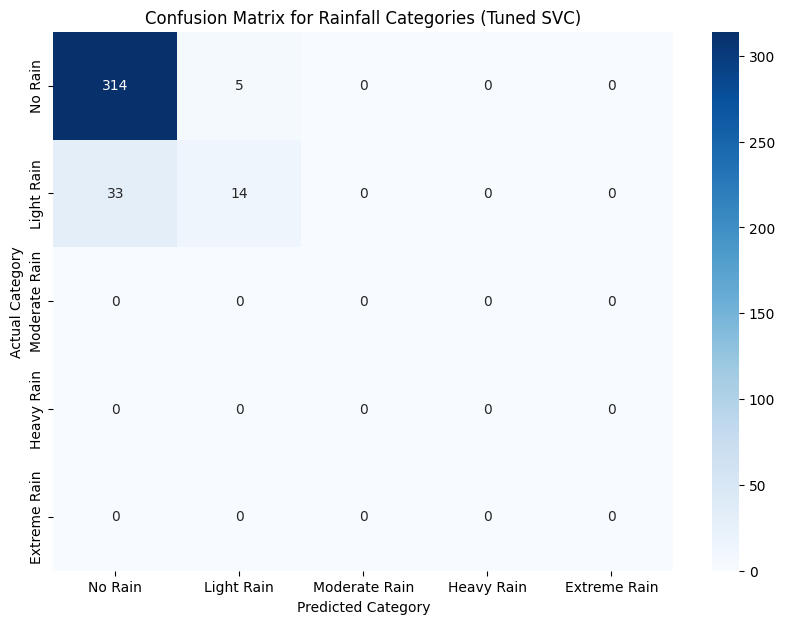

For kernel: linear, Accuracy: 0.8716
For kernel: rbf, Accuracy: 0.8880
For kernel: poly, Accuracy: 0.8962
For kernel: sigmoid, Accuracy: 0.8415


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv("Rainfall_VIJ_Final_csv.csv")

# Prepare the features and target variable
X = data[['TempMin', 'TempaMax', 'humidity', 'windspeed']]  # Features
y = data['Rainfall']  # Target variable

# Define the categorization function based on rainfall values
def categorize_rainfall(rainfall):
    if rainfall < 5:
        return 'No Rain'
    elif 5 <= rainfall < 150:
        return 'Light Rain'
    elif 10 <= rainfall < 15:
        return 'Moderate Rain'
    elif 15 <= rainfall < 50:
        return 'Heavy Rain'
    else:
        return 'Extreme Rain'

# Apply the categorization to the target variable
y_categories = y.apply(categorize_rainfall)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categories, test_size=0.2, random_state=42)

# Standardize the feature set using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'kernel': ['rbf', 'poly', 'linear']  # Kernel types
}

# Initialize the SVC model
svc = SVC(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(svc, param_grid, refit=True, verbose=1, cv=5, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Output the best parameters
print(f"Best parameters found: {best_params}")

# Use the best model to make predictions on the test set
y_pred_best = best_model.predict(X_test_scaled)

# Create a confusion matrix for the tuned model
labels = ['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain', 'Extreme Rain']
conf_matrix_best = confusion_matrix(y_test, y_pred_best, labels=labels)

# Display confusion matrix
print("Confusion Matrix after Hyperparameter Tuning:\n", conf_matrix_best)

# Display classification report for performance metrics
print("Classification Report after Hyperparameter Tuning:\n", classification_report(y_test, y_pred_best, zero_division=1))

# Visualize the confusion matrix using Seaborn heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix for Rainfall Categories (Tuned SVC)')
plt.xlabel('Predicted Category')
plt.ylabel('Actual Category')
plt.show()

# ---- Testing Multiple Kernels ----
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernels:
    model = SVC(kernel=kernel,probability=True, C=1.0)
    model.fit(X_train_scaled, y_train)
    accuracy = model.score(X_test_scaled, y_test)
    print(f'For kernel: {kernel}, Accuracy: {accuracy:.4f}')


In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=90e235f5ec987e39a0ed7fdd016a1ba5f10ffa1337e955796d8a6daaa9696bea
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
# ---- Testing Multiple Kernels ----
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernels:
    model = SVC(kernel=kernel, probability=True, C=1.0)
    model.fit(X_train_scaled, y_train)
    accuracy = model.score(X_test_scaled, y_test)
    print(f'For kernel: {kernel}, Accuracy: {accuracy:.4f}')

    # Use predict_proba to make predictions for LIME/SHAP if needed
    y_proba = model.predict_proba(X_test_scaled)
    print(f'Probability predictions for the first test instance: {y_proba[0]}')


For kernel: linear, Accuracy: 0.8716
Probability predictions for the first test instance: [0.16007094 0.83992906]
For kernel: rbf, Accuracy: 0.8880
Probability predictions for the first test instance: [0.10117006 0.89882994]
For kernel: poly, Accuracy: 0.8962
Probability predictions for the first test instance: [0.10404283 0.89595717]
For kernel: sigmoid, Accuracy: 0.8415
Probability predictions for the first test instance: [0.13650329 0.86349671]


In [ ]:
# ---- LIME Integration ----
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train_scaled,
    feature_names=X.columns,
    class_names=labels,
    mode='classification'
)

# Pick an instance from the test set to explain
i = 0  # Index for explanation
exp = explainer_lime.explain_instance(X_test_scaled[i], model.predict_proba, num_features=4)

# Display the explanation for the instance
exp.show_in_notebook(show_table=True)


In [ ]:
import shap

  0%|          | 0/50 [00:00<?, ?it/s]

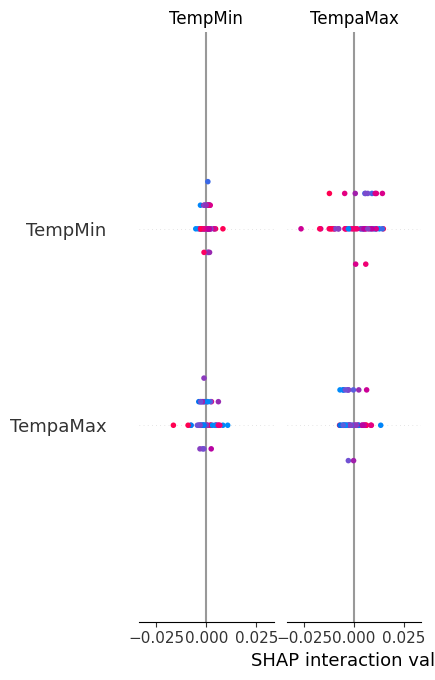

In [ ]:
# ---- SHAP Integration ----
explainer_shap = shap.KernelExplainer(model.predict_proba, X_train_scaled)

# Compute SHAP values for a subset of the test set
shap_values = explainer_shap.shap_values(X_test_scaled[:50])  # Taking 50 test points

# Plot summary for SHAP values
shap.summary_plot(shap_values, X_test_scaled[:50], feature_names=X.columns)
